# Customer Churn Prediction for a Telecom Provider
__Core Problem :__

"The central challenge is to minimize customer churn and its associated revenue loss. We must develop a system to proactively flag high-risk customers, empowering our retention teams to intervene with timely and effective strategies."


## 01-Setup and Initial Exploration

In [62]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Loading the Dataset
raw_url = "https://raw.githubusercontent.com/Javadhamidi99/Customer-Churn-Prediction-for-a-Telecome-Company--Business-Marketing/refs/heads/main/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(raw_url)

# Seeing the First Rows of the Dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
# Getting a Summary from our Dataset
df.info()

# Getting a statistical Summary of our Dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 01-01 Small Corrections in our Data Set
Fixing the Data Type for TotalCharges from object to float 64

In [43]:
# Check to see if we have empty values in our column
df['TotalCharges'].value_counts()

# Replacing Empty values with 0
df['TotalCharges'] = df['TotalCharges'].replace(" " , '0')

# Changing the type of the column
df['TotalCharges'] = df['TotalCharges'].astype('float64')

# 02-Exploratory Data Analysis (EDA)
"This is the data understanding and feature engineering stage. We act as 'data detectives' to uncover the data's story—what it tells us, its limitations, and how we can best prepare it for our analysis. Our goal is to select the most impactful features and parameters, and to remove or refine any parts of the data that might hinder our progress."

## 02-01 Analysing the Target Variable (Churn)
To check for class imbalance, we count the occurrences of each class within our target variable. This helps us understand if the dataset has an uneven distribution, where one class significantly outnumbers the others.

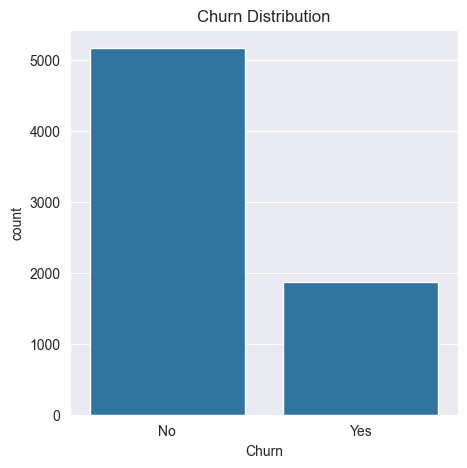

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [44]:
# Creating a count plot for Churn parameter
plt.figure(figsize = (5,5))
sns.countplot( x = 'Churn' , data = df)
plt.title('Churn Distribution')
plt.show()

# Getting the Actual percentage
print(df['Churn'].value_counts(normalize = True))

## 02-02 Analyzing Features against Churn
Let's analyze if the contract type has any correlation with our churn rate.

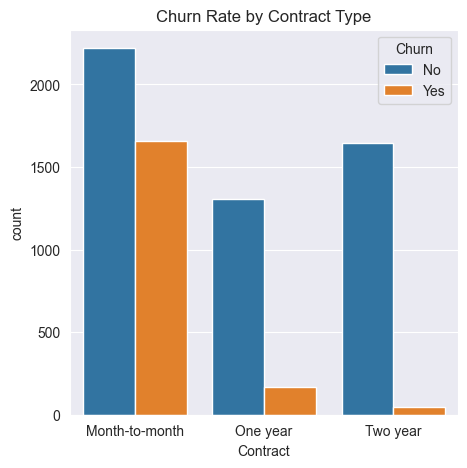

In [45]:
# 01 - Churn by Contract Type
plt.figure(figsize = (5,5))
sns.countplot( x = 'Contract' ,hue='Churn' , data = df)
plt.title('Churn Rate by Contract Type')
plt.show()

From the visualization, a clear relationship between contract type and churn rate is evident. We can observe that as the contract length increases, the churn rate significantly decreases. Customers on a month-to-month contract have the highest churn rate, while those on a two-year contract have the lowest.

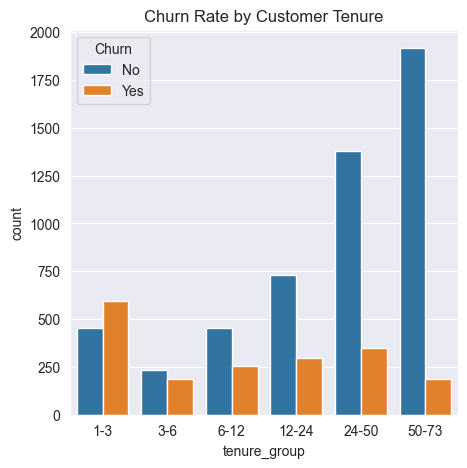

In [46]:
# 02 - Churn rate by customer tenure
# Due to the high number of unique values in tenure , we have to bin this column
bins = [0, 3, 6, 12, 24,50, 73]
bins_labels = ['1-3' , '3-6', '6-12', '12-24', '24-50', '50-73']
df['tenure_group'] = pd.cut(df['tenure'], bins, labels = bins_labels)

# Creating the actual plot
plt.figure(figsize = (5,5))
sns.countplot(x = 'tenure_group' , hue='Churn' , data = df)
plt.title('Churn Rate by Customer Tenure')
plt.show()

Based on the visualization, it's clear that customer tenure and churn rate are related. Customers in their first 3 months have the highest churn rate. This rate then drops significantly for those in the 3-6 month tenure group.

Interestingly, the churn rate appears to gradually increase again as tenure extends beyond the 6-month mark. This unexpected trend warrants further investigation to understand why long-term customers might be increasingly at risk of churning.

# 03-Data Preprocessing and Feature Engineering
Machine learning models require clean, numerical data. In this step, we'll preprocess the dataset to handle missing values, encode categorical variables, and scale numerical features, transforming it into a format our model can use.

## 03-01 Clean Data Types and Handle Missing Values

In [50]:
# Drop the few rows with missing values
df.dropna(inplace=True)

## 03-02 Encoding Categorial Variables
To prepare our data for machine learning models, which only process numerical data, we must encode our categorical features. This process transforms text-based categories into a numerical format the models can understand.

In [58]:
# Encoding the target variable (Churn)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Selecting all the other categorial columns
categorial_cols =df.select_dtypes(include = 'object').columns

# Dropping the Customer ID Column (It is not useful for our model )
categorial_cols = categorial_cols.drop('customerID')

# Using one-hot coding technique to convert these to numbers
df_ml = pd.get_dummies(df, columns= categorial_cols, drop_first = True)

df_ml.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,7590-VHVEG,-0.439916,-1.277445,-1.160323,0,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,5575-GNVDE,-0.439916,0.066327,-0.259629,0,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3668-QPYBK,-0.439916,-1.236724,-0.362660,1,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,7795-CFOCW,-0.439916,0.514251,-0.746535,0,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,9237-HQITU,-0.439916,-1.236724,0.197365,1,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


## 03-03 Scaling Numerical Values
We scale features like tenure and MonthlyCharges to prevent those with a larger range of values from disproportionately influencing the model's performance. This ensures that each feature contributes equally to the learning process.

In [60]:
scaler = StandardScaler()
numerical_cols = df_ml.select_dtypes(include= ('float64' , 'int64')).columns
df_ml[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df_ml.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,7590-VHVEG,-0.439916,-1.277445,-1.160323,-0.601023,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,5575-GNVDE,-0.439916,0.066327,-0.259629,-0.601023,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3668-QPYBK,-0.439916,-1.236724,-0.362660,1.663829,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,7795-CFOCW,-0.439916,0.514251,-0.746535,-0.601023,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,9237-HQITU,-0.439916,-1.236724,0.197365,1.663829,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


# 04 Model Building and Training
Once our data is prepared, we'll proceed with model training and evaluation. This process involves three key steps:

1. Data Splitting
First, we'll divide the dataset into three subsets: a training set, a validation set, and a test set.  This is crucial for evaluating a model's performance on unseen data and preventing overfitting. The model learns from the training data, is tuned using the validation set, and is then evaluated for final performance on the test set.

2. Model Training and Selection
Next, we'll train several different models on the training data. This allows us to compare their performance and identify which algorithm is best suited for our specific problem.

3. Hyperparameter Tuning
Finally, we'll take the best-performing model and fine-tune its hyperparameters. Hyperparameters are external settings that control how a model learns (e.g., the learning rate or the number of trees in a random forest). By optimizing these settings on the validation set, we can maximize the model's predictive accuracy before its final evaluation on the test set.

## 04-01 Splitting the Data into Training , Validation and Test Set
To build the most effective model, we'll use a train-validation-test split instead of just a train-test approach. This method allows us to tune our model's hyperparameters on the validation set while reserving the test set for a final, unbiased evaluation of its performance.

In [65]:
# Defining the features and the target
X = df_ml.drop('Churn', axis = 1)
y = df_ml['Churn']

# Extracting the test set from the whole set
X_train_val , X_test , y_train_val , y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 , stratify = y)

# Splitting the train set furthermore into validation and train
 # 0.25 * 0.8 = 0.2
X_train , X_val , y_train , y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state = 42 , stratify = y_train_val)

print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (4225, 6560)
X_val shape: (1409, 6560)
X_test shape: (1409, 6560)


## 04-02 Comparing different ML Models